### Adding below features and then applying algorithms
1. question 1 lenght
2. question 2 lenght
3. q1 number of words
4. q2 number of words
5. words common in both questions
6. words total
7. word share = word common / total words

In [23]:
import pandas as pd

df = pd.read_csv('Dataset/train.csv')

new_df = df.sample(30000, random_state=2)
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
193912,193912,293972,293973,How much commission does Paytm take from merch...,While using Paytm to get the money from the cl...,0
214303,214303,319845,319846,What are game developers' thoughts on Undertale?,"What made Undertale so great, and how do I mak...",0
226933,226933,335655,216781,What do if your crush starts ignoring you?,I have this huge crush on a boy of college. It...,0
251503,251503,209409,365625,What are some shocking facts about the Indian ...,Is there anybody in the Seattle area that know...,0
209410,209410,313693,313694,What would cause my period to come 8 days early?,What would cause my period to come 6 days early?,0


In [24]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [25]:
new_df.duplicated().sum()

0

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<AxesSubplot: >

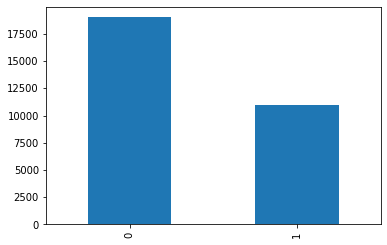

In [26]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)

new_df['is_duplicate'].value_counts().plot(kind='bar')

In [27]:
# Repeated Questions
import numpy as np

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of Unique questions', np.unique(qid).shape[0])

x = qid.value_counts() > 1
print('Number of questions repeated', x[x].shape[0])

Number of Unique questions 55299
Number of questions repeated 3480


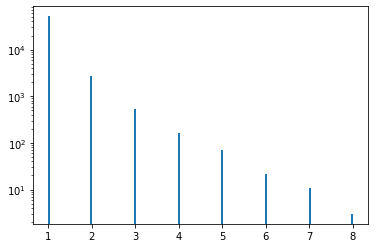

In [28]:
# Repeated questions Histogram
import matplotlib.pyplot as plt

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [29]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
239822,239822,240468,351502,How does one prove that 1 = 1?,How do I prove 1+1=2?,0,30,21
253647,253647,368227,368228,How would a scientist define god?,How do physicist define god?,0,33,28
148230,148230,50,233769,How many times a day do a clock’s hands overlap?,How many times do the hour and minute hands of...,1,48,83
99048,99048,164495,164496,What do you call a group of economists?,Is there any big economist that called Modi's ...,0,39,72
396951,396951,175416,132180,How can I get PokeCoins on Pokémon GO?,How Do I Get Unlimited Free Pokecoins In Pokem...,1,38,52


In [30]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row : len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row : len(row.split(" ")))

new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
348095,348095,476615,476616,Which is the best text for the Gujarati Kankotri?,What are the best books in Gujarati Language?,0,49,45,9,8
13514,13514,25942,25943,How can you calculate pressure under water?,How do you calculate pressure under water?,1,43,42,7,7
8553,8553,10033,7024,What is the best Python learning book for begi...,What is the best beginner's book on Python?,1,52,43,9,8
357051,357051,486442,486443,What are the differences between linear and no...,What's the difference between a linear and a n...,0,66,65,9,11
343130,343130,471203,471204,How can you troubleshoot an iPod Nano that won...,Could you see yourself succumb to insanity? Co...,0,58,102,11,16


In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w1)

In [32]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
275870,275870,52948,109453,Where is the proof of alien life?,What is the most undeniable proof of alien exi...,1,33,53,7,9,7
302336,302336,425342,425343,Is the Chinese Communist Party doing a good jo...,Will the Chinese Communist Party win if there ...,0,81,70,14,13,13
149130,149130,234990,219973,What is an INTJ person?,What are some insights on the INTJ personality...,1,23,52,5,9,5
336126,336126,463455,463456,How do I prepare for KV computer PGT exam?,How many times PGT exams conducted in a year b...,0,42,52,9,11,9
139805,139805,56128,222303,What are some good tips for freshman year in c...,What are some good tips for a freshman going t...,1,53,56,10,11,10


In [33]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return(len(w1) + len(w2))

In [34]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,13


In [51]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,24,0.50
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10,23,0.43
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20,34,0.59
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11,32,0.34
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,13,0.38


q1 minimum characters 2
q1 maximum characters 391
q1 average num of characters 59
q2 minimum characters 6
q2 maximum characters 1151
q2 average num of characters 60


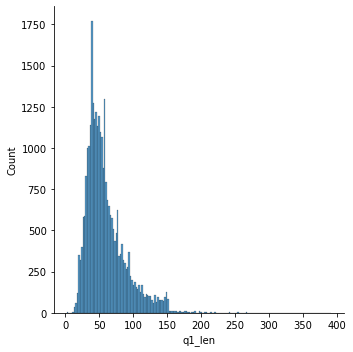

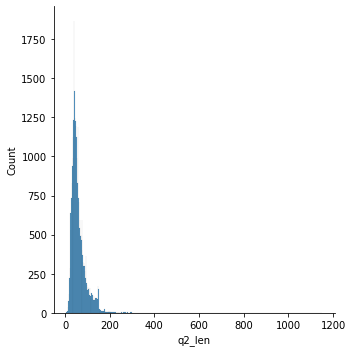

In [40]:
# Analysis of features

import seaborn as sns

sns.displot(new_df['q1_len'])
print('q1 minimum characters', new_df['q1_len'].min())
print('q1 maximum characters', new_df['q1_len'].max())
print('q1 average num of characters', int(new_df['q1_len'].mean()))


sns.displot(new_df['q2_len'] )
print('q2 minimum characters', new_df['q2_len'].min())
print('q2 maximum characters', new_df['q2_len'].max())
print('q2 average num of characters', int(new_df['q2_len'].mean()))

q1 minimum num of words 1
q1 maximum num of words 72
q1 average num of words 10
q2 minimum num of words 1
q2 maximum num of words 237
q2 average num of words 11


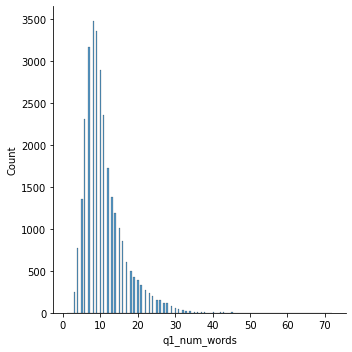

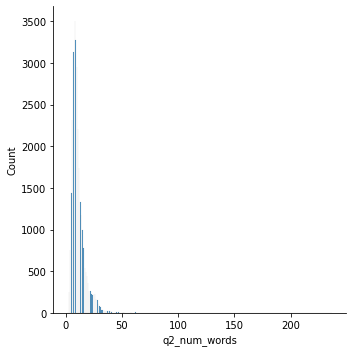

In [41]:
sns.displot(new_df['q1_num_words'])
print('q1 minimum num of words', new_df['q1_num_words'].min())
print('q1 maximum num of words', new_df['q1_num_words'].max())
print('q1 average num of words', int(new_df['q1_num_words'].mean()))


sns.displot(new_df['q2_num_words'] )
print('q2 minimum num of words', new_df['q2_num_words'].min())
print('q2 maximum num of words', new_df['q2_num_words'].max())
print('q2 average num of words', int(new_df['q2_num_words'].mean()))

C:\Users\purab\AppData\Local\Temp\ipykernel_15768\516624109.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
C:\Users\purab\AppData\Local\Temp\ipykernel_15768\516624109.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

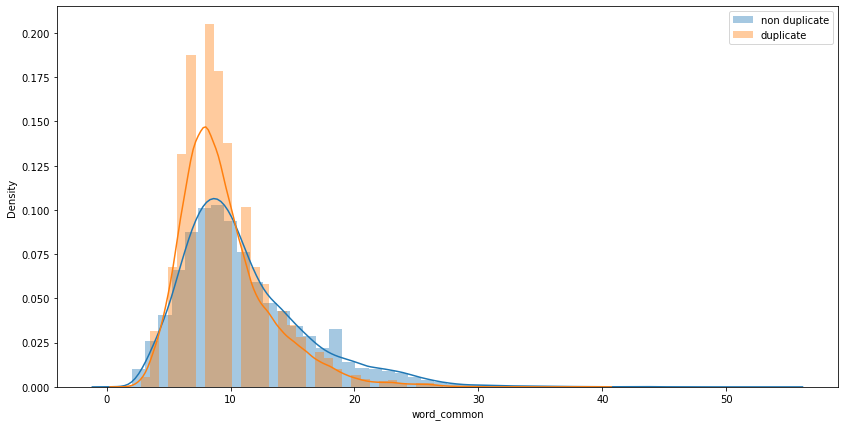

In [48]:
# common words
plt.figure(figsize=(14,7))
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\purab\AppData\Local\Temp\ipykernel_15768\2659929182.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
C:\Users\purab\AppData\Local\Temp\ipykernel_15768\2659929182.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

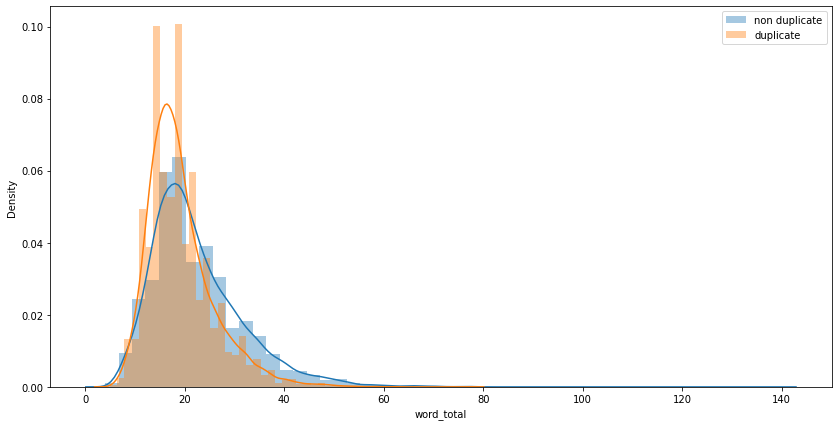

In [49]:
# common words
plt.figure(figsize=(14,7))
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\purab\AppData\Local\Temp\ipykernel_15768\1600222783.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
C:\Users\purab\AppData\Local\Temp\ipykernel_15768\1600222783.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

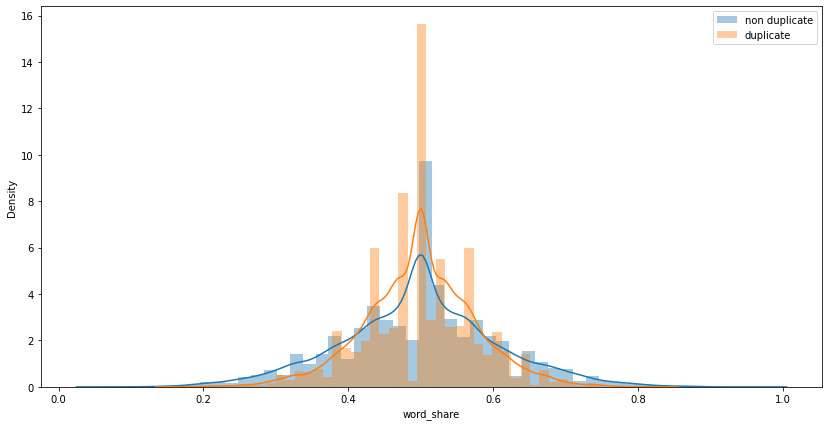

In [55]:
plt.figure(figsize=(14,7))

# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [56]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [57]:
final_df = new_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head(5)

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,12,24,0.50
115086,0,49,57,12,15,10,23,0.43
327711,0,105,120,25,17,20,34,0.59
367788,0,59,146,12,30,11,32,0.34
151235,0,35,50,5,9,5,13,0.38


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [69]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)

temp_df.shape

(30000, 6000)

In [77]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 12008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,12,24,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,10,23,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,20,34,0.59,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,11,32,0.34,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,5,13,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:], final_df.iloc[:,0].values, test_size=0.2, random_state=2)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [81]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()

# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.743

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.735

### Advanced Features
1. Token Features
    - cwc_min: This is the ratio of the number of common words to the length of the smaller question
    - cwc_max: This is the ratio of the number of common words to the length of the larger question
    - csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
    - csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
    - ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
    - ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
    - last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
    - first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

    
2. Length Based Features
    - mean_len: Mean of the length of the two questions (number of words)
    - abs_len_diff: Absolute difference between the length of the two questions (number of words)
    - longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question


3. Fuzzy Features
    - fuzz_ratio: fuzz_ratio score from fuzzywuzzy
    - fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
    - token_sort_ratio: token_sort_ratio from fuzzywuzzy
    - token_set_ratio: token_set_ratio from fuzzywuzzy
 